In [1]:
import pandas as pd
import os
BUS_PATH = "../Singapore_bus"
dirs = os.listdir(BUS_PATH)
Bus_FileName_DirList = dirs
Bus_FileName_DirList = sorted(Bus_FileName_DirList)
data_1_1 = pd.read_csv(os.path.join(BUS_PATH, Bus_FileName_DirList[9]))

In [2]:
bus_data = data_1_1.copy()
bus_data['a'] = ' '
bus_data.Ride_start_time = pd.to_datetime(
    bus_data.Ride_start_date+bus_data.a+bus_data.Ride_start_time)
bus_data.Ride_end_time = pd.to_datetime(
    bus_data.Ride_end_date+bus_data.a+bus_data.Ride_end_time)

In [3]:
bus_service = '913'  # 最大客流的线路
data = data_1_1[(data_1_1.Bus_Service_Number == bus_service)]
data = data.sort_values(by="Ride_start_time")

In [4]:
data_temp = data[['Bus_Trip_Num', 'Bus_Reg_Num',
                  'Boarding_stop_stn', 'Ride_start_time']]

In [5]:
import warnings
warnings.filterwarnings("ignore")
result_list = []
# for trip_temp in data_temp.Bus_Trip_Num.unique():
data_trip = data_temp.loc[data_temp['Bus_Trip_Num'] == 1.0]
for reg_temp in data_trip.Bus_Reg_Num.unique():
    data_reg = data_trip.loc[data_trip['Bus_Reg_Num'] == reg_temp]
    # print(data_reg)

    data_reg['Ride_start_time'] = pd.to_datetime(data_reg['Ride_start_time'])
    # print(data_reg)
    # 按 'Boarding_stop_stn' 进行分组，计算每组中最后一个搭乘时间和第一个搭乘时间的差值
    result = data_reg.drop_duplicates('Boarding_stop_stn')
    result['time_diff'] = result['Ride_start_time'].diff().dt.total_seconds()
    # 剔除差值为零的行
    result = result.dropna()
    result_list = result_list + result.time_diff.tolist()

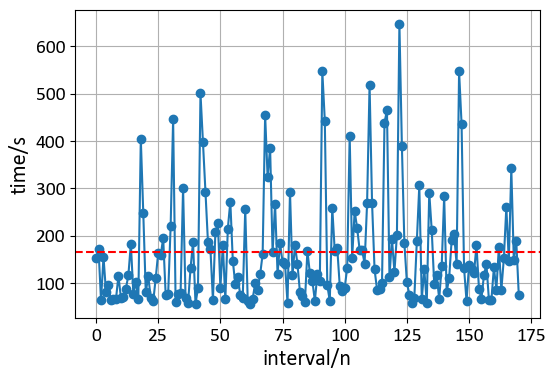

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Calibri'
fig = plt.figure(figsize=(6, 4))
plt.plot(result_list[0:171], marker='o')
# plt.title('站间行驶时间统计',fontsize=16)
# plt.xticks(result_df.index[::4])
average_value = sum(result_list[0:171]) / len(result_list[0:171])
plt.axhline(y=average_value, color='r', linestyle='--', label='Average')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('interval/n', fontsize=16)
plt.ylabel('time/s', fontsize=16)
plt.grid(True)
plt.show()
fig.savefig('./站间时间_new.svg', bbox_inches='tight')